### Question 1: Wine classification (50)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

1. Split the data into training and testing(20%). Scale the data. 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2. Fit a SVM model, using the type of wine as the target value, and Alcohol	and Malicacid as the features. Report the classification accuracy. 

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel = "linear")
X_train=X_train.iloc[:,:2]
X_test=X_test.iloc[:,:2]
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.75


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. Visualize the result from previous question. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


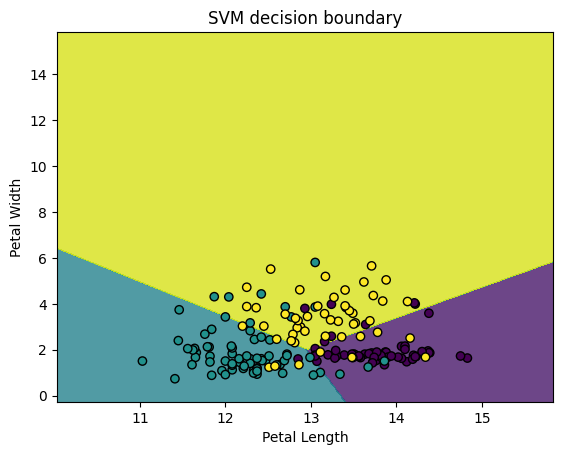

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the features (petal length and petal width)
X = X.iloc[:, 0:2]
y = wine.data.targets 

# Create a meshgrid of points to make predictions
x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,0].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                   np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha = 0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c = y.iloc[:,0], edgecolor = 'k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM decision boundary')
plt.show()

4. Fit the SVM model, using all features and type of wines as the target value. Divide the training data into training and validation. Use the validation part to tune the parameter of kernel type and the value of C and then the training part to fit the model. Report the classification report table on test data, as well as the best parameters. 

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

# Create an SVR regressor
svm_classifier = SVC(kernel = "linear")

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the regressor on the best hyperparameters
best_regressor = SVC(**best_params)
best_regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_regressor.predict(X_test_scaled)
print("The best parameters :"+ str(best_params))
print(classification_report(y_pred,y_test))



The best parameters :{'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.93      0.81      0.87        16
           3       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

5. Now, use the Alcohol as the target and all the other features as the features. Fit a SVM and report the metrics. (No need to tune the parameters)

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
X = wine.data.features
y=X['Alcohol']
X=X.drop(columns=['Alcohol'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svm_classifier = SVR(kernel = "linear")
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = mean_squared_error(y_test, y_pred)
print(accuracy)

0.3238453726256049


### Question 2: Explain the concepts (20)

1. Explain what is margin and support vector in the SVM (5)

the margin is the difference between the hyperlane and the nearest observation to the hyperplane. The support vector are the points closest to the margin that set the boundary.

2. Explain the difference and similarity between SVC and SVR (10)

SVR is used for regression, SVC is used for classification and SVR uses a margin of error while svc does not because it is a classifier. But both of these algorthims use margins (in different ways but still) and support vectors. They also both use kernels to better fit certain types of data.

3. Explain the difference of the definition of error in SVR and linear regression (5)

So in linear regression the error rate is the difference between the prediction and actual value but in SVR the error term allows for a level of tolerance which reducing the error term, leading to the eplison tube error.

### Question 3: SVM with Gradient descend (30)

Using the follwing structure to implement the SVM with gradient descend. Test your functions with a simulated data. 

In [33]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.beta0 = None
        self.beta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y1 = np.where(y <= 0, -1, 1)
        self.beta0 = 0
        self.beta = np.zeros(n_features)

        for epoch in range(1, self.num_epochs + 1):
            for i in range(n_samples):
                xi = X[i, :]
                yi = y1[i]
                condition = yi * (np.dot(xi, self.beta) + self.beta0) >= 1
                if not condition:
                    self.beta = self.beta - self.learning_rate * (-2 * yi * xi)
                    self.beta0 = self.beta0 - self.learning_rate * (-2 * yi)

    def predict(self, X):
        return np.sign(np.dot(X, self.beta) + self.beta0)

In [34]:
np.random.seed(5220)
X_train = np.random.randn(100, 2)
y_train = np.concatenate([-np.ones(50), np.ones(50)])

svm_model = LinearSVM(learning_rate=0.01, num_epochs=1000)
svm_model.fit(X_train, y_train)

X_test = np.random.randn(10, 2)
predictions = svm_model.predict(X_test)

print("Predictions:", predictions)

Predictions: [ 1.  1.  1. -1.  1.  1.  1.  1.  1.  1.]
